In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import folium
import geopandas
from geopandas.tools import geocode
%matplotlib inline

In [ ]:
St = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALL_SPB_STOPS.csv', sep=";", header = 0, index_col='STOP_NAME',  encoding='cp1251')

In [ ]:
St.head()

,ID_STOP,LATITUDE,LONGITUDE
STOP_NAME,,,
Пр.Ветеранов-1,100101,59.841604,30.253984
Пр.Ветеранов-2,100102,59.842042,30.250084
Ленинский пр.-1,100103,59.851683,30.268385
Ленинский пр.-2,100104,59.849710,30.268348
Автово,100105,59.867292,30.261133


In [ ]:
row = St.loc["Звездная"]
x = row.LATITUDE
y = row.LONGITUDE
print(row)

ID_STOP      100202.000000
LATITUDE         59.833318
LONGITUDE        30.349144
Name: Звездная, dtype: float64


In [ ]:
St = St.loc[(St['LATITUDE'] - x)*(St['LATITUDE']- x) + (St['LONGITUDE'] - y)*(St['LONGITUDE'] - y) < 0.0001]

In [ ]:
St.head()

,ID_STOP,LATITUDE,LONGITUDE
STOP_NAME,,,
Звездная,100202,59.833318,30.349144
"Метро ""Звёздная"" Т (29)",16450,59.833353,30.348349
"Улица Ленсовета, 87 Т (29)",16457,59.835880,30.343553
"Улица Ленсовета, 87 Т (29)",16619,59.836075,30.343010
"Метро ""Звёздная"" Т (29)",16625,59.833683,30.347464


In [ ]:
mapit = folium.Map( location=[x, y], zoom_start=14.5)
for lat , lon in zip(St.LATITUDE , St.LONGITUDE):
  folium.Marker(location=[ lat,lon ]).add_to(mapit)
mapit


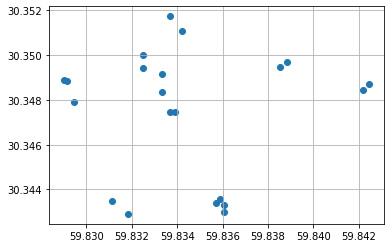

In [ ]:
del St['ID_STOP']
plt.scatter(St['LATITUDE'], St['LONGITUDE'])
plt.grid()

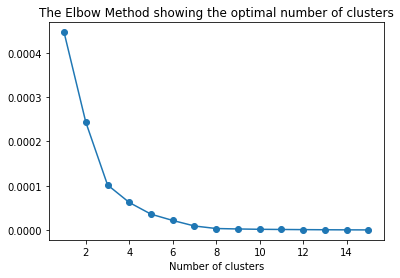

In [ ]:
from sklearn.cluster import KMeans
wcss = []
K = range(1, 16)
models = [KMeans(n_clusters=k).fit(St) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(St)

In [ ]:
St['cluster'] = kmeans.labels_
St['cluster'].sort_values()

STOP_NAME
МЯСОКОМБИНАТ [34]<                            0
Мясокомбинат Т (конечная, 29)                 0
МЯСОКОМБИНАТ [34]                             0
Звездная                                      1
Метро "Звёздная" Т (29)                       1
УЛ. ЛЕНСОВЕТА, 90                             1
Метро "Звёздная" Т (29)                       1
ЗВЕЗДНАЯ УЛ.,УГ. ПУЛКОВСКОЙ УЛ. [16]          1
СТ.МЕТРО "ЗВЕЗДНАЯ"                           1
СТ. МЕТРО "ЗВЕЗДНАЯ"                          1
СТ. МЕТРО "ЗВЕЗДНАЯ" [34, 50, 116]            1
ПУЛКОВСКАЯ УЛ., УГ. УЛ. ОРДЖОНИКИДЗЕ          2
ПУЛКОВСКАЯ УЛ., ТОРГОВЫЙ ЦЕНТР [16]<          2
ПУЛКОВСКАЯ УЛ., УГ. УЛ. ОРДЖОНИКИДЗЕ [16]<    2
ПУЛКОВСКАЯ УЛ., ТОРГОВЫЙ ЦЕНТР [16]           2
ЗВЕЗДНАЯ УЛ.                                  3
УЛ. ЛЕНСОВЕТА,87 [50]                         3
Улица Ленсовета, 87 Т (29)                    3
Улица Ленсовета, 87 Т (29)                    3
ЗВЕЗДНАЯ УЛ.                                  3
УЛ. ЛЕНСОВЕТА,87 [50]<        

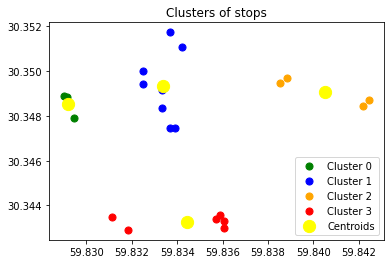

In [ ]:
plt.scatter(St.loc[St['cluster']==0]['LATITUDE'], St.loc[St['cluster']==0]['LONGITUDE'], s = 50, c = 'green', label = 'Cluster 0')
plt.scatter(St.loc[St['cluster']==1]['LATITUDE'], St.loc[St['cluster']==1]['LONGITUDE'], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(St.loc[St['cluster']==2]['LATITUDE'], St.loc[St['cluster']==2]['LONGITUDE'], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(St.loc[St['cluster']==3]['LATITUDE'], St.loc[St['cluster']==3]['LONGITUDE'], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stops')
plt.legend()
plt.show()

In [ ]:
mapit = folium.Map( location=[x, y], zoom_start=14.5)
for lat , lon in zip(St.loc[St['cluster']==0]['LATITUDE'], St.loc[St['cluster']==0]['LONGITUDE']):
  folium.Marker(location=[ lat,lon ], icon=folium.Icon(color="green")).add_to(mapit)
for lat , lon in zip(St.loc[St['cluster']==1]['LATITUDE'], St.loc[St['cluster']==1]['LONGITUDE']):
  folium.Marker(location=[ lat,lon ], icon=folium.Icon(color="blue")).add_to(mapit)
for lat , lon in zip(St.loc[St['cluster']==2]['LATITUDE'], St.loc[St['cluster']==2]['LONGITUDE']):
  folium.Marker(location=[ lat,lon ], icon=folium.Icon(color="orange")).add_to(mapit)
for lat , lon in zip(St.loc[St['cluster']==3]['LATITUDE'], St.loc[St['cluster']==3]['LONGITUDE']):
  folium.Marker(location=[ lat,lon ], icon=folium.Icon(color="red")).add_to(mapit)
mapit